# Example 5: Special functions

Let's construct a dataset which contains special functions $f(x,y)={\rm exp}(J_0(20x)+y^2)$, where $J_0(x)$ is the Bessel function.

In [17]:
from kan import *

# create a KAN: 2D inputs, 1D output, and 5 hidden neurons. cubic spline (k=3), 5 grid intervals (grid=5).
model = KAN(width=[2,1,1], grid=3, k=3, seed=2)
f = lambda x: torch.exp(torch.special.bessel_j0(20*x[:,[0]]) + x[:,[1]]**2)
dataset = create_dataset(f, n_var=2)

# train the model
model.fit(dataset, opt="LBFGS", steps=20);

checkpoint directory created: ./model
saving model version 0.0


| train_loss: 5.15e-01 | test_loss: 5.84e-01 | reg: 5.91e+00 | : 100%|█| 20/20 [00:02<00:00,  7.39it

saving model version 0.1


Plot trained KAN, the bessel function shows up in the bettom left

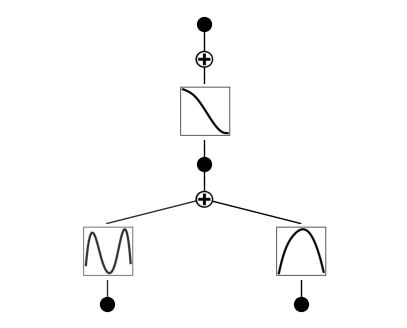

In [18]:
model.plot()

In [19]:
model = model.refine(20)
model.fit(dataset, opt="LBFGS", steps=20);

saving model version 0.2


| train_loss: 2.70e-02 | test_loss: 9.15e-02 | reg: 7.69e+00 | : 100%|█| 20/20 [00:05<00:00,  3.49it

saving model version 0.3


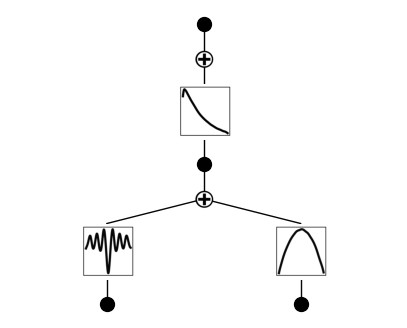

In [20]:
model.plot()

suggest_symbolic does not return anything that matches with it, since Bessel function isn't included in the default SYMBOLIC_LIB. We want to add Bessel to it.

In [21]:
model.suggest_symbolic(0,0,0)

  function  fitting r2   r2 loss  complexity  complexity loss  total loss
0        0    0.000000  0.000014           0                0    0.000003
1        x    0.002039 -0.002930           1                1    0.799414
2       J0    0.200055 -0.322009           2                2    1.535598
3      cos    0.168072 -0.265453           2                2    1.546909
4      sin    0.168072 -0.265453           2                2    1.546909


('0',
 (<function kan.utils.<lambda>(x)>,
  <function kan.utils.<lambda>(x)>,
  0,
  <function kan.utils.<lambda>(x, y_th)>),
 0.0,
 0)

In [22]:
SYMBOLIC_LIB.keys()

dict_keys(['x', 'x^2', 'x^3', 'x^4', 'x^5', '1/x', '1/x^2', '1/x^3', '1/x^4', '1/x^5', 'sqrt', 'x^0.5', 'x^1.5', '1/sqrt(x)', '1/x^0.5', 'exp', 'log', 'abs', 'sin', 'cos', 'tan', 'tanh', 'sgn', 'arcsin', 'arccos', 'arctan', 'arctanh', '0', 'gaussian', 'J0'])

add bessel function J0 to the symbolic library. we should include a name and a pytorch implementation. c is the complexity assigned to J0.

In [23]:
add_symbolic('J0', torch.special.bessel_j0, c=1)

After adding Bessel, we check suggest_symbolic again

In [24]:
# J0 fitting is not very good
model.suggest_symbolic(0,0,0)

  function  fitting r2   r2 loss  complexity  complexity loss  total loss
0        0    0.000000  0.000014           0                0    0.000003
1       J0    0.200055 -0.322009           1                1    0.735598
2        x    0.002039 -0.002930           1                1    0.799414
3      cos    0.168072 -0.265453           2                2    1.546909
4      sin    0.168072 -0.265453           2                2    1.546909


('0',
 (<function kan.utils.<lambda>(x)>,
  <function kan.utils.<lambda>(x)>,
  0,
  <function kan.utils.<lambda>(x, y_th)>),
 0.0,
 0)

The fitting r2 is still not high, this is because the ground truth is J0(20x) which involves 20 which is too large. our default search is in (-10,10). so we need to set the search range bigger in order to include 20. now J0 appears at the top of the list


In [25]:
model.suggest_symbolic(0,0,0,a_range=(-40,40))

  function  fitting r2   r2 loss  complexity  complexity loss  total loss
0       J0    0.998490 -9.361690           1                1   -1.072338
1        0    0.000000  0.000014           0                0    0.000003
2        x    0.002039 -0.002930           1                1    0.799414
3      cos    0.580127 -1.251939           2                2    1.349612
4      sin    0.580127 -1.251939           2                2    1.349612


('J0',
 (<function torch._C._special.special_bessel_j0>,
  J0,
  1,
  <function torch._C._special.special_bessel_j0>),
 0.9984899759292603,
 1)